In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/data/26.02.21/learningSet.csv', low_memory=False)

## Check for null values in the numerical columns.

In [3]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()



In [4]:
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

<AxesSubplot:ylabel='Frequency'>

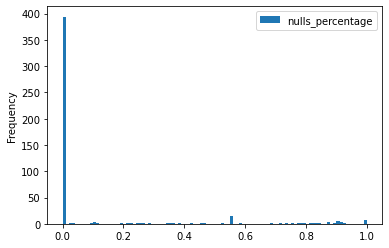

In [5]:
# histogram of the null value distribution of your 450 columns
nulls_percent_df.sort_values(by=['nulls_percentage'], ascending=False).plot(kind='hist', bins=100)

In [6]:
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [7]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage'] > 0.25]['column_name']

In [8]:
drop_column_list = list(columns_above_threshold)

In [9]:
drop_column_list.remove('WEALTH1')

In [10]:
data = data.drop(columns=drop_column_list)
data.shape

(95412, 410)

## Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [11]:
data['GEOCODE2'].value_counts()
#make empty space>> A

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [12]:
data['GEOCODE2'] = data['GEOCODE2'].replace(' ' ,'A')

In [13]:
data['GEOCODE2'].value_counts()

A    34671
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [14]:
data['GEOCODE2'].isna().sum()

132

In [15]:
data['WEALTH1'].value_counts()
#no nulls, no cleaning needed

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [23]:
data['WEALTH1'].isna().sum()
#interpolate the nulls

0

In [24]:
data['WEALTH1'].fillna((data['WEALTH1'].mean()), inplace=True)

In [25]:
data['WEALTH1'].isna().sum()

0

In [42]:
data['ADI'].value_counts().to_frame()

,ADI
13.0,7296
51.0,4622
65.0,3765
57.0,2836
105.0,2617
...,...
147.0,1
161.0,1
651.0,1
103.0,1


In [38]:
data['ADI'].value_counts(normalize=True, ascending=False)

13.0     0.076574
51.0     0.048510
65.0     0.039515
57.0     0.029765
105.0    0.027466
           ...   
147.0    0.000010
161.0    0.000010
651.0    0.000010
103.0    0.000010
601.0    0.000010
Name: ADI, Length: 204, dtype: float64

In [43]:
cutoff = 100

In [44]:
data['ADI'] = data['ADI'].apply(lambda x: x if x > cutoff else None)

In [45]:
data['ADI'].value_counts(normalize=True, ascending=False)

105.0    0.041224
197.0    0.032686
109.0    0.032356
131.0    0.031158
201.0    0.027913
           ...   
103.0    0.000016
147.0    0.000016
161.0    0.000016
651.0    0.000016
601.0    0.000016
Name: ADI, Length: 165, dtype: float64

In [47]:
data['DMA'].value_counts(ascending=False)
#interpolation

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
516.0       1
552.0       1
554.0       1
584.0       1
Name: DMA, Length: 206, dtype: int64

In [ ]:
data['MSA'].value_counts()


In [ ]:
num_columns = numericals.columns
num_array = numericals.head(100).to_numpy()
imputer = KNNImputer(n_neighbors=3)
num_fill_array = imputer.fit_transform(num_array)
num_imputed = pd.DataFrame(data=num_fill_array, columns=num_columns)
num_imputed

LAB 7.3

1.Let's start with implementing another algorithm for feature selection, which is the Select K Best. We have provided a code to you that you can use directly. Your task is to complete the parts missing in the code.


2. Let's work on the case where the target is categorical and the features are numerical. You can use the chi square method and select top k features.


3. As you might notice here, one of the disadvantages of using select_k_best is that we have to provide the value of k ourself, through an estimated guess. We will see how the algorithm uses the chi square score to select the top k features. There is a huge imbalance in the dataset as one category is very under-represented. For now, check the application on the data (as it is), and later we will talk about methods to remove the imbalance.

In [ ]:
numericals = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/data/21.03.01/data_7.03_activities/files_for_activities/numerical.csv', low_memory=False)

In [ ]:
targets = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/data/21.03.01/data_7.03_activities/files_for_activities/target.csv')

In [ ]:
targets

In [ ]:
num_columns = numericals.columns
num_array = numericals.head(100).to_numpy()
imput = KNNImputer(n_neighbors=3)
num_fill_array = imputer.fit_transform(num_array)
num_imputed = pd.DataFrame(data=num_fill_array, columns=num_columns)
num_imputed

In [ ]:
tar_columns = targets.columns
tar_array = targets.head(100).to_numpy()
imputer = KNNImputer(n_neighbors=3)
tar_fill_array = imputer.fit_transform(tar_array)
tar_imputed = pd.DataFrame(data=tar_fill_array, columns=tar_columns)
tar_imputed

In [ ]:
X = num_imputed
y = tar_imputed['TARGET_B'] #whether people respondent to our email or not

#from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# Here we chose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()



In [ ]:
# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df =pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] =num_imputed.columns
# Sorting data
print(df.sort_values(['score'], ascending = False).head(10))